## 고고학 연구동향 연구(가제)
* [DBpia-Crawler](https://github.com/ChanToRe/DBpia-Crawler)를 통해 수집된 고고학 논문을 분석하여 2000년 이후 고고학 연구 동향을 살핌
* 워드클라우드 시각화 기법과 토픽 모델링 기법을 활용하여 연구동향을 분석

### 설치
```bash
pip install tqdm
pip install pandas
pip install matplotlib
pip install konlpy
pip install wordcloud
```

### 진행
1. 크롤러 개발 (2022/01/26 완료)
2. 데이터 체크 및 한자 번역 (2022/01/31 완료)
3. 명사 추출 및 빈도 체크 (2022/02/01 완료) 
4. 워드 클라우드 적용 확인 (2022/02/02 완료)
5. 불용어 지정 (2022/02/04 진행중) [#1](https://github.com/ChanToRe/Archaeological-research-trend-analysis/issues/1#issue-1123805974) 참조

In [116]:
import pandas as pd
import hanja
from tqdm import tqdm
import matplotlib.pyplot as plt
from konlpy.tag import Mecab
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from collections import Counter
import csv
import re

In [117]:
#데이터 로드 & 한글 깨짐 방지
plt.rcParams['font.family'] = 'AppleGothic'
data = pd.read_csv('./Data-before.csv')
df = pd.DataFrame(data)

In [118]:
#제목 한자 번역
before_title = df[['title']] #제목 추출
list_before_title = before_title.values.tolist() #제목 리스트화
after_title = [] #번역 후 제목 리스트


for i in tqdm(range(len(list_before_title))):
    trans = hanja.translate(list_before_title[i], "substitution")
    after_title.append(trans)

100%|██████████| 2705/2705 [00:00<00:00, 9377.19it/s]


In [119]:
trans_result = df.assign(translate_title = after_title)
DB = pd.DataFrame(trans_result)
sort_DB = DB.sort_values(by=['date'])
#DB.to_excel("~/Desktop/result.xlsx")

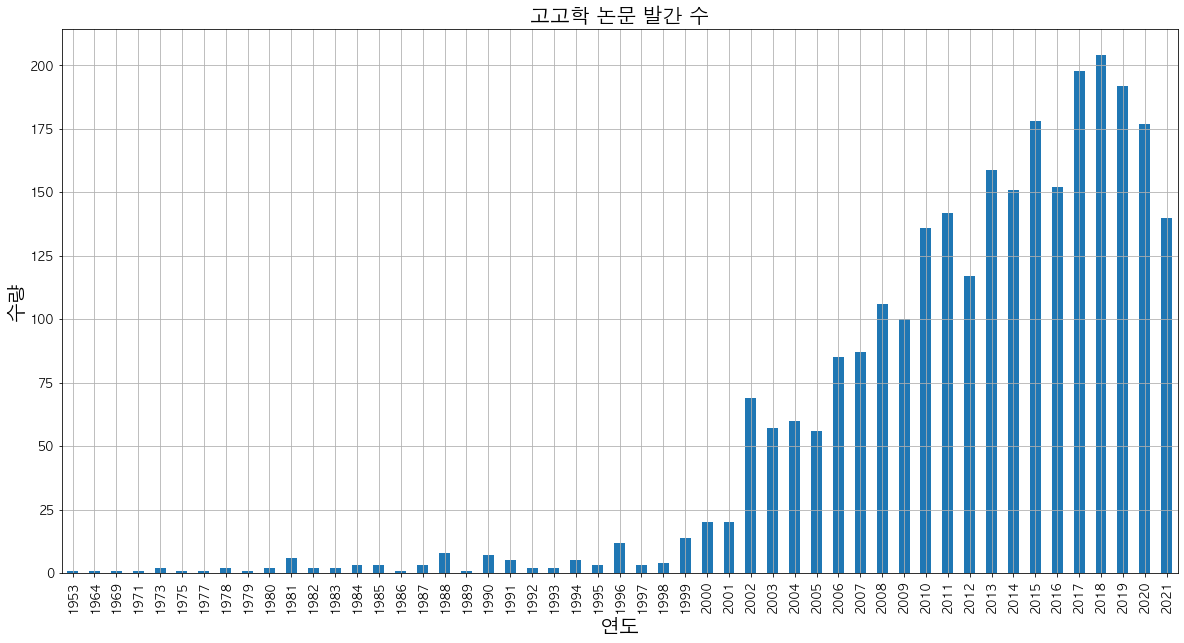

In [120]:
#고고학 논문 발간 수 그래프
sort_DB["date"].value_counts().sort_index().plot(kind='bar')
plt.rcParams["figure.figsize"] = (20,10)
plt.title("고고학 논문 발간 수", fontsize=20)
plt.xlabel("연도", fontsize=20)
plt.ylabel("수량", fontsize=20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid()
plt.show()

---

In [121]:
#Mecab 생성
mecab = Mecab()
wc = WordCloud(width=1000, height=1000, random_state=0, max_words=50, max_font_size=300 ,background_color="white", font_path=r'~/Library/Fonts/AppleGothic.ttf')

In [122]:
#불용어 처리
def clean_text(row):
    text = row['translate_title']
    stopwords = ['을', '를', '이', '가', '은', '는', '고고학', '연구', '중심', '지역', '시대', '연구', '문화', '자료', '과정', '검토', '출토', '성격', '세기', '유적', '양상', '변화', '변천', '성']
    
    txt = re.sub('[^가-힣a-z]', ' ', text)
    text = mecab.morphs(txt)
    text = [t for t in text if t not in stopwords]
    return text

trans_result['translate_title'] = trans_result.apply(clean_text, axis=1)
trans_result

,title,author,publisher,journal,date,translate_title
0,상주 지역의 신라 고총에 대한 역사고고학적 이해,김대환,신라사학회,신라사학보,2021,"[상주, 의, 신라, 고총, 에, 대한, 역사, 적, 이해]"
1,조선 전기(15~16세기) 완상의 분위기와 청자 화분의 재현,오영인,한국중세고고학회,한국중세고고학,2021,"[조선, 전기, 완상, 의, 분위기, 와, 청자, 화분, 의, 재현]"
2,기와로 본 고려시대 대전 상대동유적의 성격,최정혜,한국중세고고학회,한국중세고고학,2021,"[기와, 로, 본, 고려, 대전, 상대동, 의]"
3,고려 말-조선 초 공납자기 생산체계의 변화,박경자,한국중세고고학회,한국중세고고학,2021,"[고려, 말, 조선, 초, 공납, 자기, 생산, 체계, 의]"
4,여말선초 경남지역 와요 출토 평기와의 변천양상,김성진,한국중세고고학회,한국중세고고학,2021,"[여말, 선초, 경남, 와요, 평기와, 의]"
...,...,...,...,...,...,...
2700,榮山江流域의 先史 遺蹟ㆍ遺物 : 榮山江 流域의 考古學的 調査硏究(2),崔夢龍,역사학회,역사학보,1973,"[영산, 강류, 역, 의, 선사, 유물, 영산강, 역, 의, 적, 조사]"
2701,考古學,金元龍,역사학회,역사학보,1971,[]
2702,美術史ㆍ考古學,秦弘燮,역사학회,역사학보,1969,[미술사]
2703,한국고고학의 신자료 일이,김원룡,서울대학교 동아문화연구소,동아문화,1964,"[한국, 의, 신, 일]"


In [123]:
#분기별 구분
date_trash = trans_result[trans_result['date'] < 2000] #2000년대 이전

#2000년대 발간 논문
date_zero = trans_result[(trans_result['date'] >= 2000) & (trans_result['date'] < 2010)]
date_zero_title = pd.DataFrame(date_zero['translate_title'])
date_zero_title.to_csv("./date_zero_title.csv", sep = "\t", index=False)
zero = open("./date_zero_title.csv", 'r', encoding="UTF-8")
data_zero = zero.read()
zero.close()

#2010년대 발간 논문
date_ten = trans_result[(trans_result['date'] >= 2010) & (trans_result['date'] < 2020)] 
date_ten_title = pd.DataFrame(date_ten['translate_title'])
date_ten_title.to_csv("./date_ten_title.csv", sep = "\t", index=False)
ten = open("./date_ten_title.csv", 'r', encoding="UTF-8")
data_ten = ten.read()
ten.close()

#2020년대 발간 논문
date_twenty = trans_result[trans_result['date'] > 2019] 
date_twenty_title = pd.DataFrame(date_twenty['translate_title'])
date_twenty_title.to_csv("./date_twenty_title.csv", sep = "\t", index=False)
twenty = open("./date_twenty_title.csv", 'r', encoding="UTF-8")
data_twenty = twenty.read()
twenty.close()

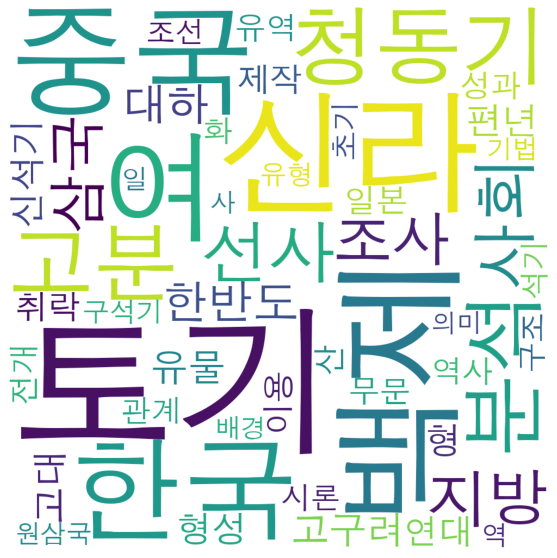

In [124]:
#2000년대 발간 논문 명사 빈도 카운트
zero_noun = mecab.nouns(data_zero)
zero_count = Counter(zero_noun)
zero_noun_list = zero_count.most_common(50)
plt.axis("off")
plt.imshow(wc.generate_from_frequencies(dict(zero_noun_list)))

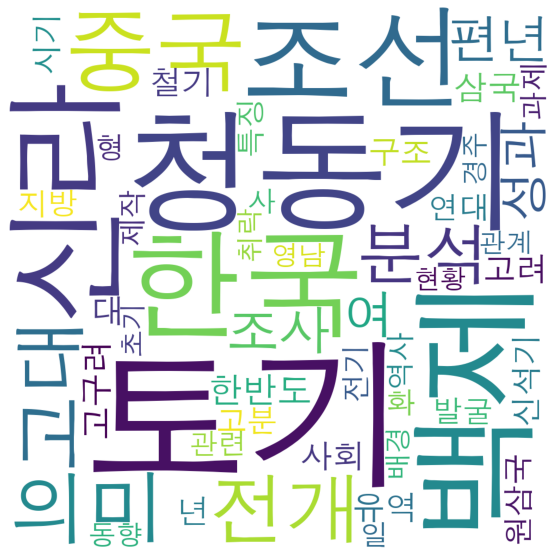

In [125]:
#2010년대 발간 논문 명사 빈도 카운트
ten_noun = mecab.nouns(data_ten)
ten_count = Counter(ten_noun)
ten_noun_list = ten_count.most_common(50)
plt.axis("off")
plt.imshow(wc.generate_from_frequencies(dict(ten_noun_list)))

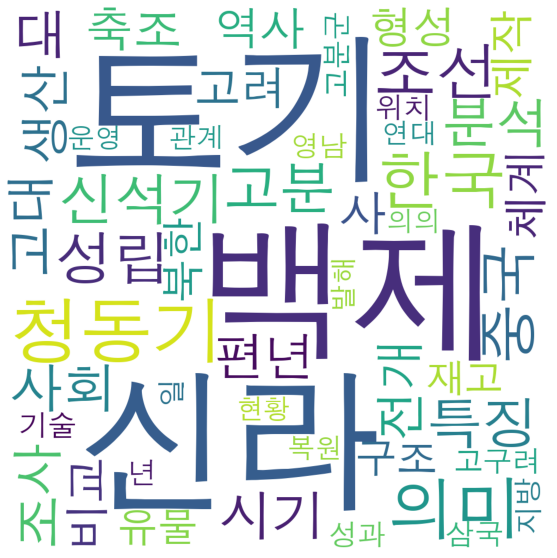

In [126]:
#2020년대 발간 논문 명사 빈도 카운트
twenty_noun = mecab.nouns(data_twenty)
twenty_count = Counter(twenty_noun)
twenty_noun_list = twenty_count.most_common(50)
plt.axis("off")
plt.imshow(wc.generate_from_frequencies(dict(twenty_noun_list)))